In [1]:
import pandas as pd
df = pd.read_csv('~/Downloads/melb_data.csv')
X = df.drop('Price', axis=1)  
y = df['Price']
groups = df['Suburb'] 
df.shape[1]
print(df.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


**EDA**

In [2]:
import csv as csv_package
import os
import re

import pandas as pd
import random
import numpy as np

from tqdm import tqdm
from pathlib import Path
from numpy import append
from collections import defaultdict
df.describe().transpose()
print(df.head())
print("the shape of the dataframe is:", df.shape)
print(df.columns)
print(df.dtypes)


       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0     

In [ ]:
#EDA
import matplotlib.pyplot as plt
df['Price_aj']=df['Price']/1000

df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)


df['Year'] = df['Date'].dt.year
df['MonthSold'] = df['Date'].dt.month

average_prices_by_month = df.groupby(['Year', 'MonthSold'])['Price_aj'].mean()


# Plotting by month-year
average_prices_by_month.plot(kind='line', title='Average House Sales Price by Month-Year')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.ylabel('Average Sales Price, thousand dollar')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plotting by year
average_prices_by_year = df.groupby('Year')['Price_aj'].mean()
average_prices_by_year.plot(kind='bar', title='Average House Sales Price by Year')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.ylabel('Average Sales Price, thousand dollar')
plt.show()

# recode "Date" variable into 12 categories by month

average_prices_by_month2 = df.groupby(['MonthSold'])['Price_aj'].mean()
average_prices_by_month2.plot(kind='line', title='Average House Sales Price by Month')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(ticks=range(1, 13))
plt.ylim(0, 1600)
plt.ylabel('Average Sales Price, thousand dollar')
plt.xlabel('Month')
txt = "(Melbourne's winter months coincide with a cooler real estate market. )"
plt.figtext(0.5, -0.05, txt, ha='center')
plt.tight_layout()
plt.savefig('mel7/EDA3.png')
plt.show()

mean: 1075684.079455081


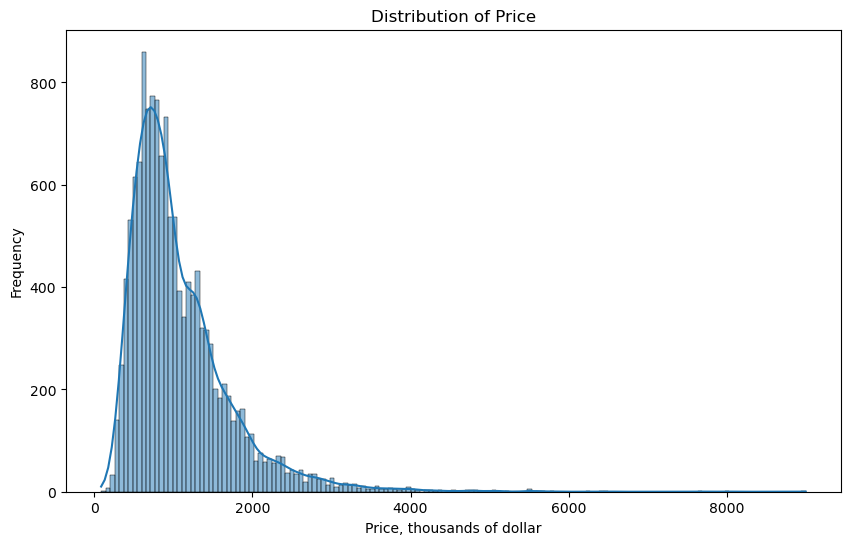

0.25     650000.0
0.50     903000.0
0.75    1330000.0
0.95    2290050.0
0.99    3338150.0
Name: Price, dtype: float64


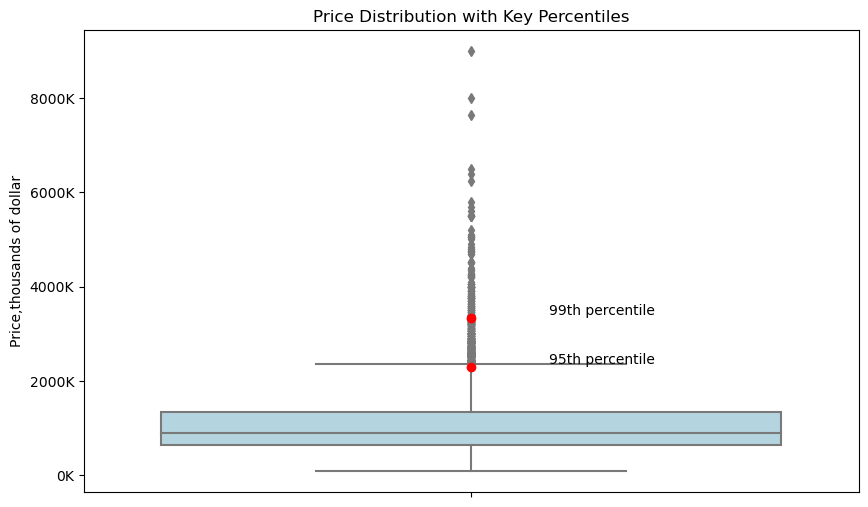

In [6]:
#target variable
import seaborn as sns
import matplotlib.ticker as mticker

print('mean:',df['Price'].mean())

plt.figure(figsize=(10, 6))
sns.histplot(df['Price_aj'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price, thousands of dollar')
plt.ylabel('Frequency')
#plt.savefig('mel7/y1.png',dpi=300)
plt.show()

print(df['Price'].quantile([0.25, 0.5, 0.75, 0.95, 0.99]))


quantiles = df['Price'].quantile([0.25, 0.5, 0.75, 0.95, 0.99])


plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Price'], color='lightblue')


plt.scatter(x=[0, 0], y=[quantiles[0.95], quantiles[0.99]], color='red', zorder=5)


plt.text(x=0.1, y=quantiles[0.95], s='95th percentile', verticalalignment='bottom')
plt.text(x=0.1, y=quantiles[0.99], s='99th percentile', verticalalignment='bottom')


plt.title('Price Distribution with Key Percentiles')
plt.ylabel('Price,thousands of dollar')


plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

#plt.savefig('mel7/y2.png',dpi=300)
plt.show()




In [9]:
#missing data
missing_data= df.isna().sum()

missing_values_df = pd.DataFrame({'Column Name': missing_data.index, 'Empty Values': missing_data.values})

print(missing_values_df)


# Features with missing values and count
columns_with_missing = missing_data[missing_data > 0]
print("Columns with missing values and their count:")
for col, count in columns_with_missing.items():
    print(f"Column '{col}': {count} missing values")

# Fraction of rows with missing values
fraction_rows_with_missing = df.isna().any(axis=1).mean()
print(f"\nFraction of rows with missing values: {fraction_rows_with_missing:.2%}")

# Fraction of columns with missing values
fraction_cols_with_missing = df.isna().any(axis=0).mean()
print(f"\nFraction of columns with missing values: {fraction_cols_with_missing:.2%}")

# Overall fraction of missing values
overall_fraction_missing = df.isna().mean().mean()
print(f"\nOverall fraction of missing values: {overall_fraction_missing:.2%}")

      Column Name  Empty Values
0          Suburb             0
1         Address             0
2           Rooms             0
3            Type             0
4           Price             0
5          Method             0
6         SellerG             0
7            Date             0
8        Distance             0
9        Postcode             0
10       Bedroom2             0
11       Bathroom             0
12            Car            62
13       Landsize             0
14   BuildingArea          6450
15      YearBuilt          5375
16    CouncilArea          1369
17      Lattitude             0
18     Longtitude             0
19     Regionname             0
20  Propertycount             0
21       Price_aj             0
22           Year             0
23      MonthSold             0
Columns with missing values and their count:
Column 'Car': 62 missing values
Column 'BuildingArea': 6450 missing values
Column 'YearBuilt': 5375 missing values
Column 'CouncilArea': 1369 missing value

In [12]:
#Understand feature

#Y variable - price
pd.set_option('display.float_format', '{:.2f}'.format)
df['Price'].describe()

#other features
print(df.columns)
print(df.dtypes)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Price_aj', 'Year',
       'MonthSold'],
      dtype='object')
Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                float64
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount           

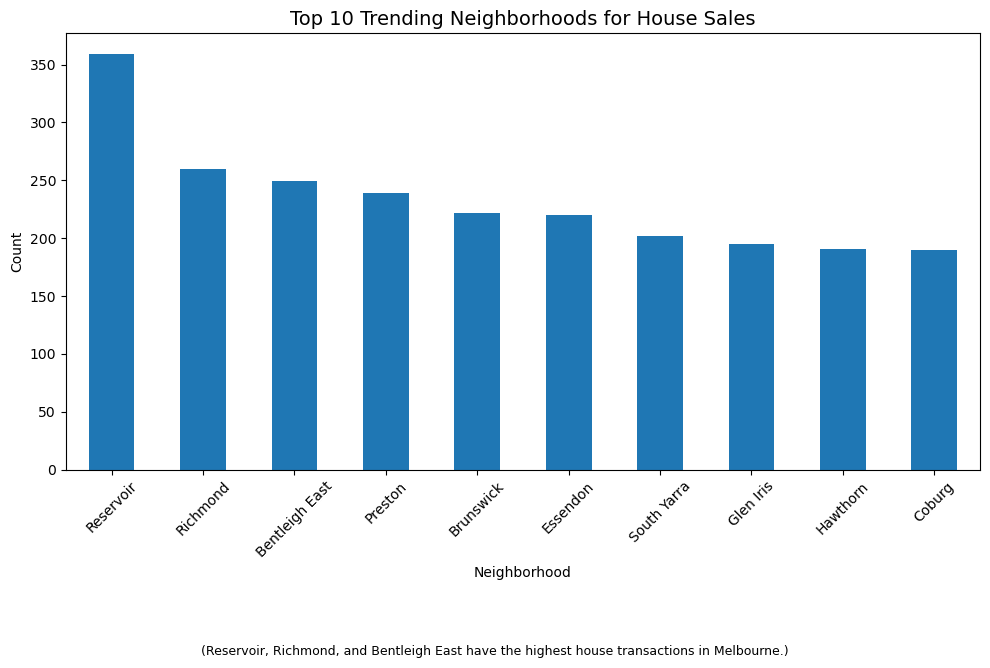

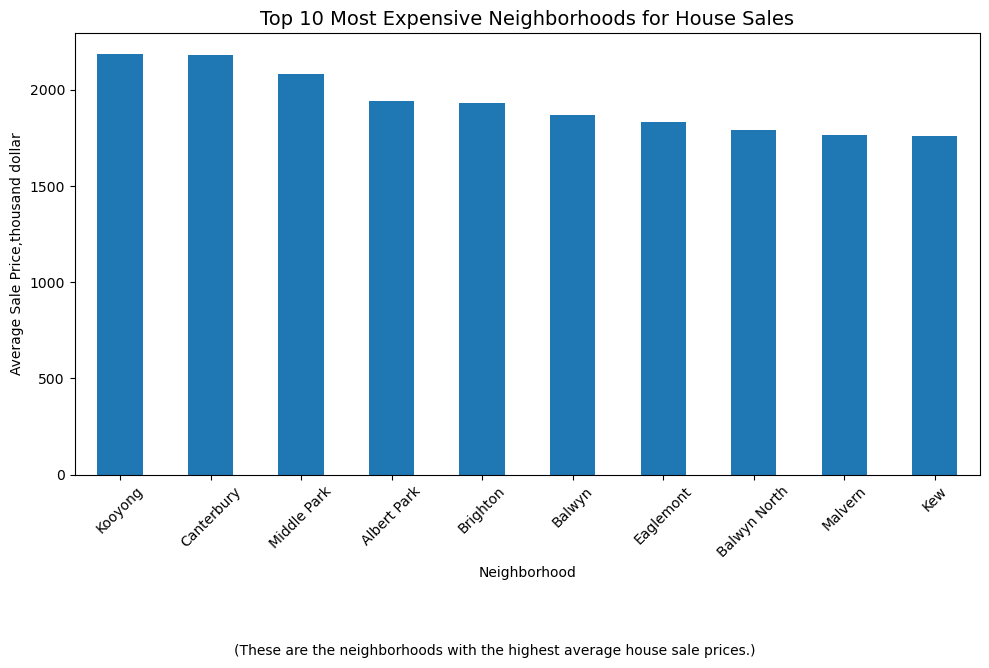

In [15]:
#Group sturcture variable - suburb
N = 10
top_categories = df['Suburb'].value_counts().head(N).index

df['Suburb_aj'] = df['Suburb'].where(df['Suburb'].isin(top_categories), 'Other')
filtered_counts = df['Suburb_aj'].value_counts()
filtered_counts = filtered_counts[filtered_counts.index != 'Other']

# Plotting
plt.figure(figsize=(10, 6)) 
filtered_counts.plot.bar()
plt.xlabel('Neighborhood',fontsize=10)
plt.ylabel('Count')
plt.title('Top 10 Trending Neighborhoods for House Sales',fontsize=14)
plt.xticks(rotation=45)
txt = "(Reservoir, Richmond, and Bentleigh East have the highest house transactions in Melbourne.)"
plt.figtext(0.5, -0.1, txt, wrap=True, ha='center', fontsize=9) 
plt.tight_layout()

plt.savefig('figures/EDA4_trending.png', bbox_inches='tight',dpi=500)
plt.show()

average_prices = df.groupby('Suburb')['Price_aj'].mean()


top_expensive_suburbs = average_prices.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6)) 
top_expensive_suburbs.plot.bar()
plt.xlabel('Neighborhood',fontsize=10)
plt.ylabel('Average Sale Price,thousand dollar')
plt.title('Top 10 Most Expensive Neighborhoods for House Sales',fontsize=14)
plt.xticks(rotation=45)
txt = "(These are the neighborhoods with the highest average house sale prices.)"
plt.figtext(0.5, -0.1, txt, ha='center')  
plt.tight_layout()

plt.savefig('figures/EDA4_expensive.png', bbox_inches='tight', dpi=500)
plt.show()



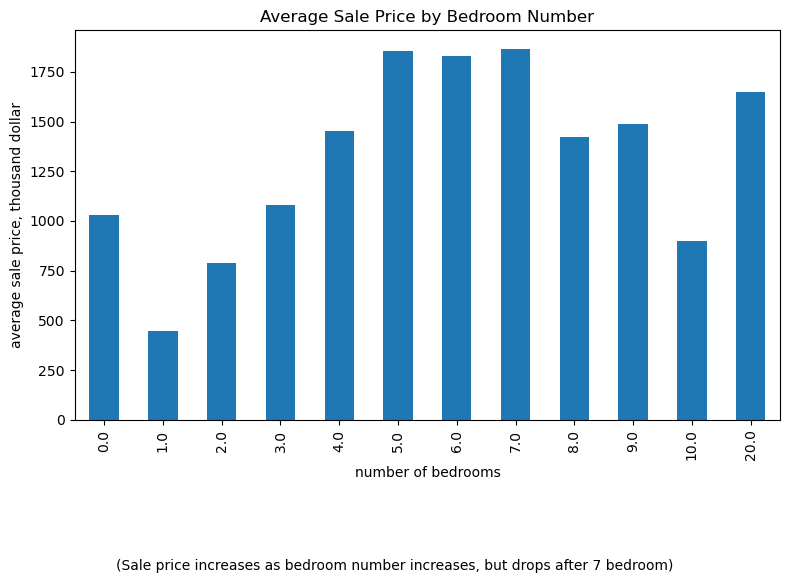

In [16]:
#sale price vs. bedroom number

avg_prices = df.groupby('Bedroom2')['Price_aj'].mean().sort_index()

avg_prices.plot(kind='bar', figsize=(8, 5))
plt.ylabel('average sale price, thousand dollar')
plt.xlabel('number of bedrooms')
plt.title('Average Sale Price by Bedroom Number')
txt = "(Sale price increases as bedroom number increases, but drops after 7 bedroom)"
plt.figtext(0.5, -0.15, txt, ha='center')
plt.tight_layout()
plt.show()


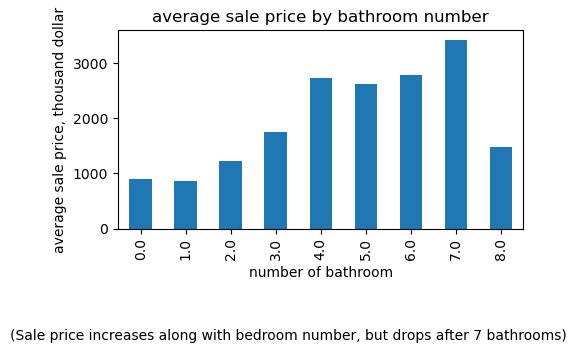

In [17]:
#sale price vs. bathroom number

avg_prices = df.groupby('Bathroom')['Price_aj'].mean().sort_index()


avg_prices.plot(kind='bar', figsize=(5, 3))
plt.ylabel('average sale price, thousand dollar')
plt.xlabel('number of bathroom')
plt.title('average sale price by bathroom number')
txt = "(Sale price increases along with bedroom number, but drops after 7 bathrooms)"
plt.figtext(0.5, -0.15, txt, ha='center')
plt.tight_layout()
plt.show()

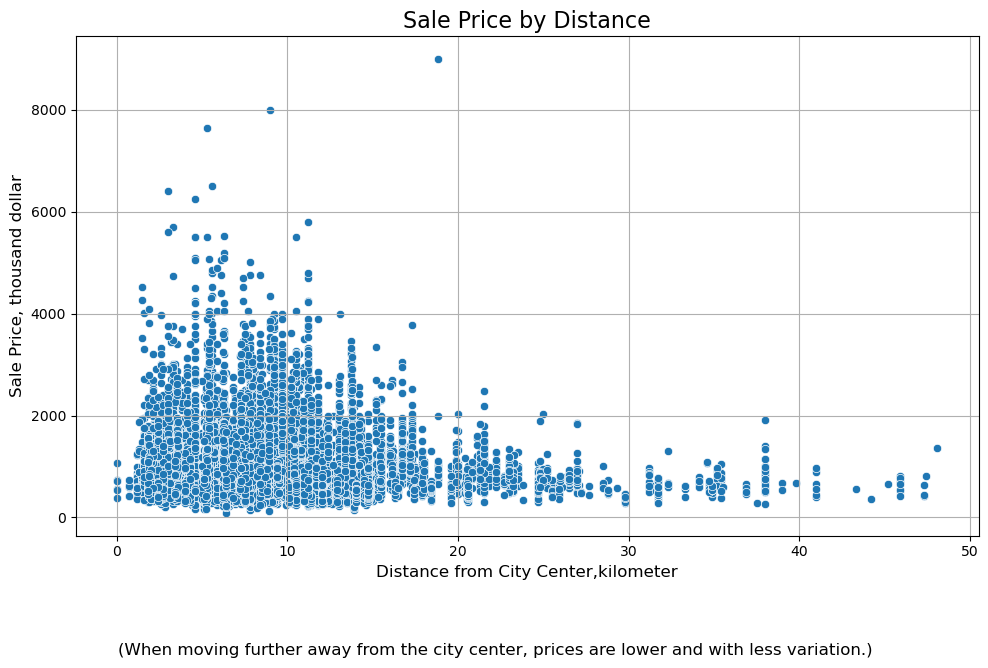

In [99]:

plt.rcParams.update({'font.size': 10, 'font.family': 'sans-serif'})

plt.figure(figsize=(10, 6))  
sns.scatterplot(x=df['Distance'], y=df['Price_aj'])

plt.title('Sale Price by Distance', fontsize=16)
plt.xlabel('Distance from City Center,kilometer', fontsize=12)
plt.ylabel('Sale Price, thousand dollar', fontsize=12)


txt = "(When moving further away from the city center, prices are lower and with less variation.)"
plt.figtext(0.5, -0.1, txt, ha='center', fontsize=12)

plt.grid(True)

plt.tight_layout()
plt.savefig('mel7/EDA_distance.png', bbox_inches='tight',dpi=500)
plt.show()


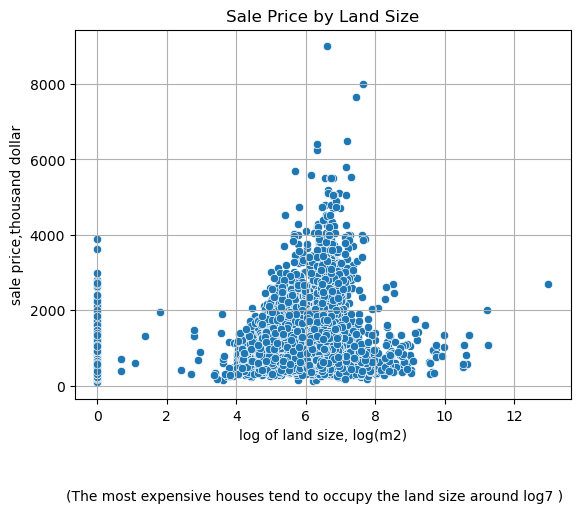

In [19]:
#Sale Price by Land Size

df['Log_Landsize'] = np.log(df['Landsize'] + 1)

sns.scatterplot(x=df['Log_Landsize'], y=df['Price_aj'])
plt.title('Sale Price by Land Size')
plt.xlabel('log of land size, log(m2)')
plt.ylabel('sale price,thousand dollar')
txt = "(The most expensive houses tend to occupy the land size around log7 )"
plt.figtext(0.5, -0.1, txt, ha='center')
plt.grid(True)
plt.show()


In [ ]:
#feature correlation test
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

cat_ftrs = ['Suburb', 'Type', 'Method', 'SellerG', 'Postcode', 'CouncilArea', 'Regionname']
num_ftrs = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']

# Function for Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

# Pearson Correlation for Numerical Features
print("Pearson Correlation for Numerical Features:")
correlation_matrix = df[num_ftrs].corr(method='pearson')
print(correlation_matrix)

# Cramér's V for Categorical Features
print("\nCramér's V for Categorical Features:")
for cat_feature in cat_ftrs:
    for num_feature in num_ftrs:
        print(f"Cramér's V between {cat_feature} and {num_feature}: {cramers_v(df[cat_feature], df[num_feature])}")


# ANOVA for Categorical-Numerical Combinations
print("\nANOVA for Categorical-Numerical Combinations:")
for cat_feature in cat_ftrs:
    model = ols(f'Price ~ C({cat_feature})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA table for {cat_feature} and Price:\n{anova_table}\n')




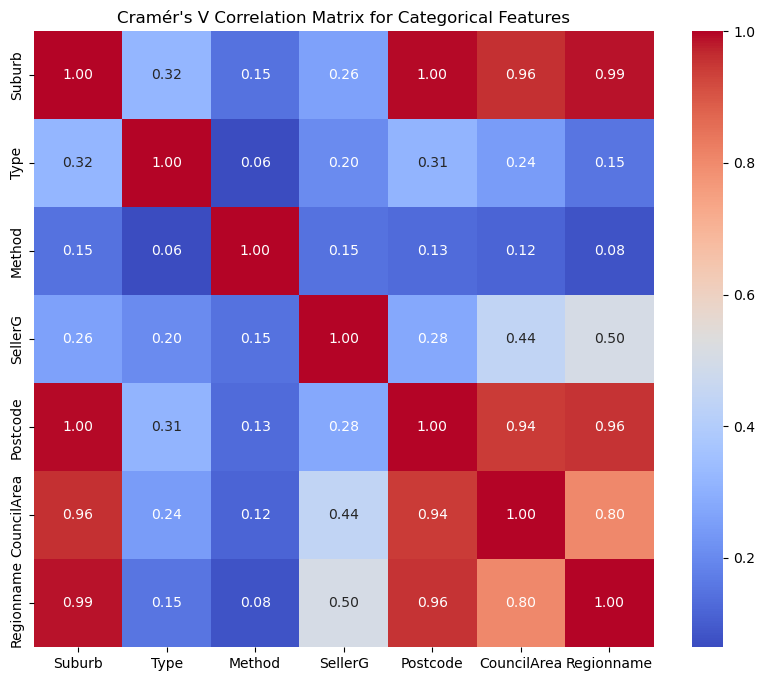

In [76]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))


cramers_v_matrix = pd.DataFrame(np.zeros((len(cat_ftrs), len(cat_ftrs))), index=cat_ftrs, columns=cat_ftrs)

for cat_feature1 in cat_ftrs:
    for cat_feature2 in cat_ftrs:
        cramers_v_matrix.loc[cat_feature1, cat_feature2] = cramers_v(df[cat_feature1], df[cat_feature2])

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Cramér's V Correlation Matrix for Categorical Features")
plt.savefig('results/correlation.png', dpi=300)
plt.show()


**Preprocessing**

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import GroupKFold, GroupShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer


from sklearn.model_selection import GroupKFold, GroupShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('~/Downloads/melb_data.csv')
X = df.drop('Price', axis=1)  
y = df['Price']
groups = df['Suburb']  # Groups defined by 'Suburb'


In [39]:
categorical_cols = ['Suburb', 'Type', 'Method']
numerical_cols = ['Rooms', 'Distance','Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_cols),
        ('num', numerical_pipeline, numerical_cols)
    ], remainder='drop')

In [40]:
#baseline performance & evaluation metric:
import math

mean_price = df['Price'].mean()
baseline_predictions = [mean_price] * len(df['Price'])
squared_diff = (df['Price'] - baseline_predictions) ** 2
mse = squared_diff.mean()
rmse = math.sqrt(mse)
print("Baseline Mean Squared Error (MSE):", mse)
print("Baseline Root Mean Squared Error (RMSE):", rmse)

def rmse_score(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

rmse_scorer = make_scorer(rmse_score, greater_is_better=False)



Baseline Mean Squared Error (MSE): 408688105130.5178
Baseline Root Mean Squared Error (RMSE): 639287.1851762069


**xgboost**

In [55]:
from sklearn.base import clone
import xgboost as xgb
import numpy as np
from sklearn.model_selection import GroupKFold, GroupShuffleSplit, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline


def ML_pipeline_groups_GridSearchCV(X, y, groups, random_state, n_folds):
    splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=random_state)
    for i_other, i_test in splitter.split(X, y, groups):
        X_other, y_other, groups_other = X.iloc[i_other], y.iloc[i_other], groups.iloc[i_other]
        X_test, y_test, groups_test = X.iloc[i_test], y.iloc[i_test], groups.iloc[i_test]

        X_train, X_val, y_train, y_val, groups_train, groups_val = train_test_split(
            X_other, y_other, groups_other, test_size=0.2, random_state=random_state)

        # Fit the preprocessor on the training data
        
        preprocessor_clone = clone(preprocessor)
        preprocessor_clone.fit(X_train)
        transformed_feature_names = preprocessor_clone.get_feature_names_out()

        # Transform training, validation, and test data
        X_train_transformed = preprocessor_clone.transform(X_train)
        X_val_transformed = preprocessor_clone.transform(X_val)
        X_test_transformed = preprocessor_clone.transform(X_test)

        group_kfold = GroupKFold(n_splits=n_folds)

        model = xgb.XGBRegressor(random_state=random_state)

        pipe = Pipeline([
            ('model', model)
        ])

        param_grid = {
            "model__learning_rate": [0.03],
            # "model__learning_rate": [0.03,0.05],
            "model__n_estimators": [1000],
            "model__seed": [0],
            "model__missing": [np.nan],
            "model__max_depth": [1, 3, 10, 30, 100],
            "model__colsample_bytree": [0.9],
            "model__subsample": [0.66],
            "model__early_stopping_rounds": [50], 
        }

        grid_search = GridSearchCV(
            pipe,
            param_grid=param_grid,
            cv=group_kfold,
            scoring=rmse_scorer,
            return_train_score=True,
            n_jobs=-1,
            # verbose=2,
            # error_score='raise'
        )

        # Fit the model with the training set and use the transformed validation set for early stopping
        grid_search.fit(X_train_transformed, y_train, groups=groups_train,
                        model__eval_set=[(X_val_transformed, y_val)])
        best_rmse = grid_search.best_score_
        
        return grid_search, best_rmse, (X_test_transformed, y_test),model,transformed_feature_names


In [ ]:
grid, best_rmse, (X_test_transformed, y_test), model,transformed_feature_names = ML_pipeline_groups_GridSearchCV(X, y, groups, random_state=38, n_folds=4)
print("Best parameters:", grid.best_params_)
print("Best RMSE score:", best_rmse)

# Calculate RMSE on the test set
y_pred = grid.best_estimator_.predict(X_test_transformed)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE:", test_rmse)



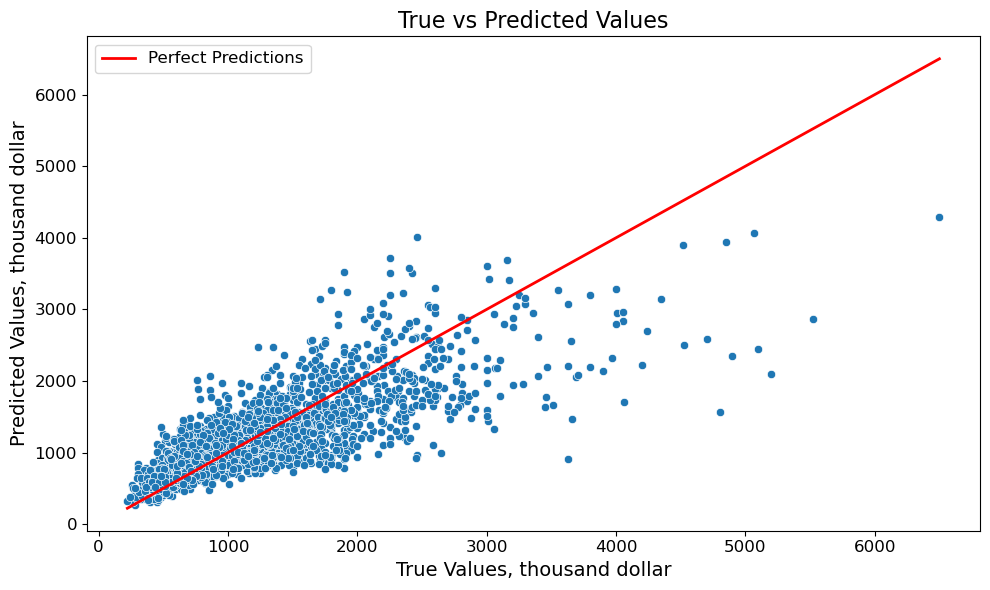

In [70]:
plt.rcParams['figure.figsize'] = (10, 6)

y_test_scaled = y_test / 1000
y_pred_scaled = y_pred / 1000
sns.scatterplot(x=y_test_scaled, y=y_pred_scaled)

plt.xlabel('True Values, thousand dollar', fontsize=14)  
plt.ylabel('Predicted Values, thousand dollar', fontsize=14)  
plt.title('True vs Predicted Values', fontsize=16)  

plt.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], color='red', lw=2, label='Perfect Predictions')
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('mel7/true_pred.png', dpi=300)
plt.show()


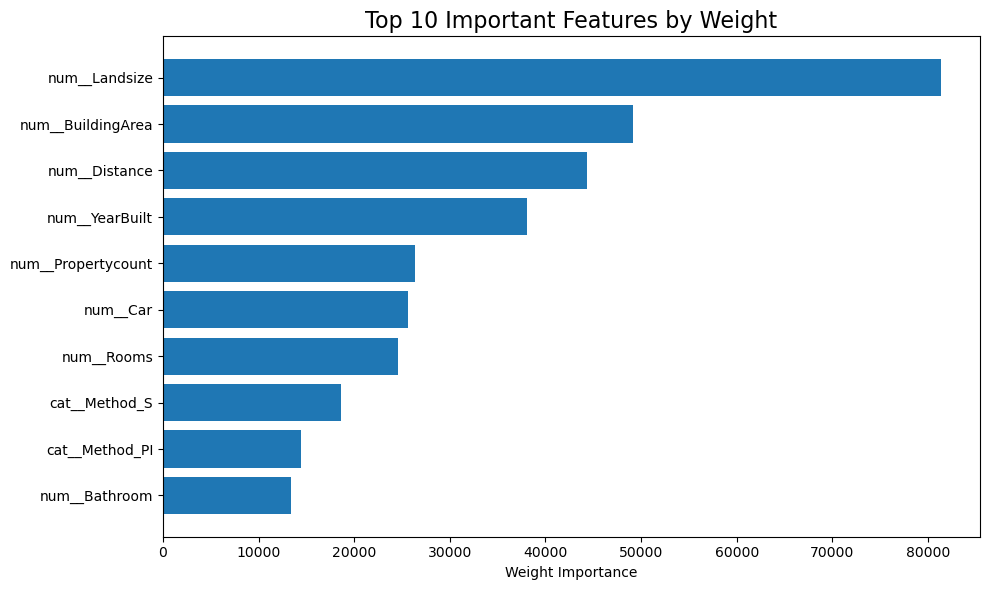

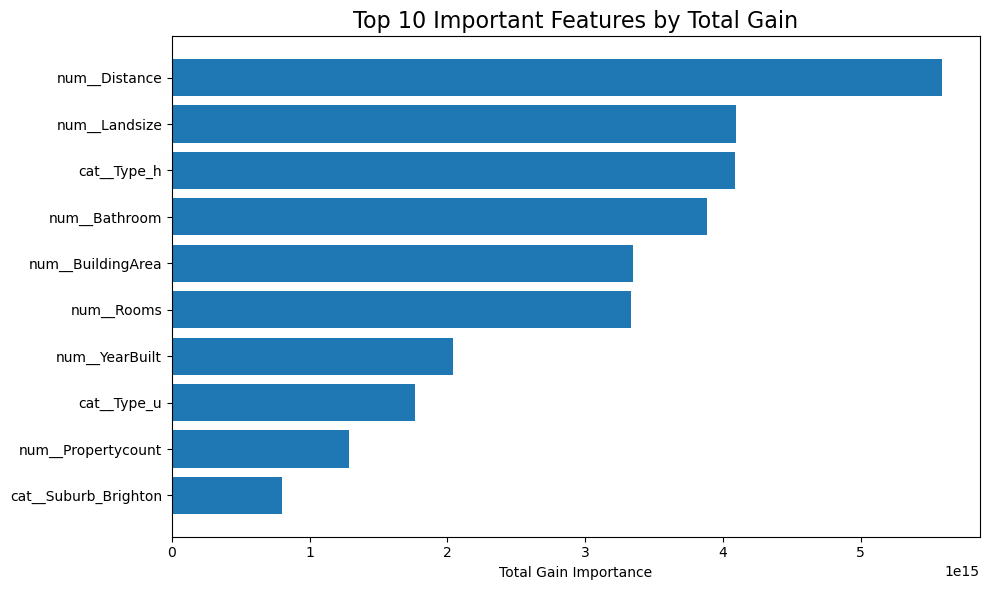

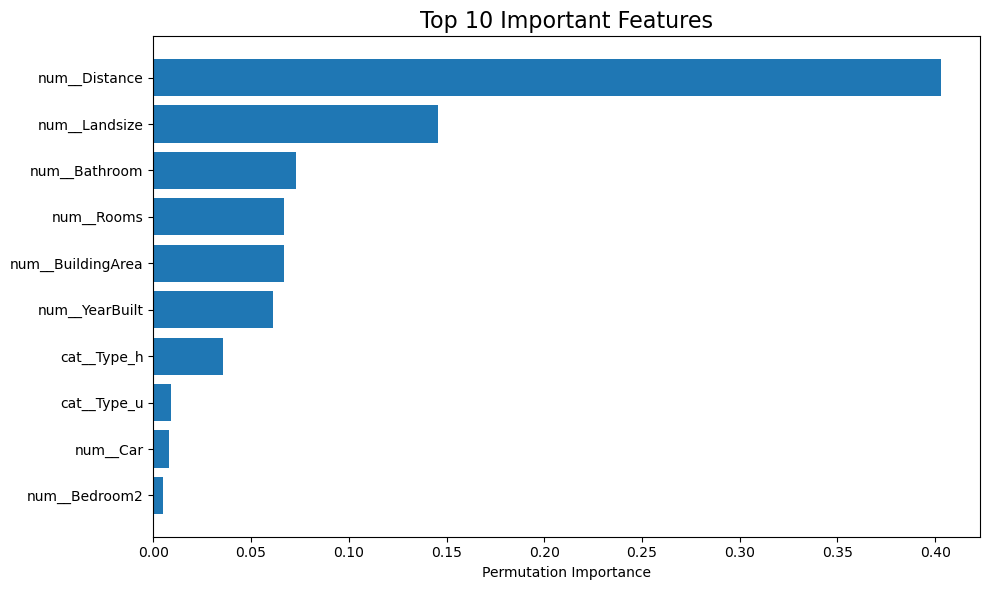

In [100]:
#Global Importance
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import shap

# All XGB Importance Metrics

# import shap

# Create a SHAP explainer using the best estimator from your grid search
best_model = grid.best_estimator_.named_steps['model']
explainer = shap.Explainer(best_model)

# Select data points with indices 3, 100, 200
indices = [3, 100, 200]
selected_data = X_test_transformed[indices, :]

# Calculate SHAP values for the selected data points
shap_values = explainer.shap_values(selected_data)
precision = 2

for i, index in enumerate(indices):
    # shap.force_plot(explainer.expected_value, shap_values_subset, rounded_values, feature_names=feature_labels, text_rotation=45,matplotlib=True)

    sorted_indices = np.argsort(-np.abs(shap_values[i]))
    shap_values_subset = shap_values[i][sorted_indices]
    feature_names_subset = [transformed_feature_names[j] for j in sorted_indices]

    # Round the feature values in the data point and create labels with these rounded values
    data_point_subset = selected_data[i, sorted_indices]
    rounded_values = np.round(data_point_subset, precision)
    feature_labels = [f"{name} = {value}" for name, value in zip(feature_names_subset, rounded_values)]

    # Create the force plot for the selected data point
    shap.force_plot(explainer.expected_value, shap_values_subset, rounded_values, feature_names=feature_labels, text_rotation=45,matplotlib=True)
    
    # shap_plot = shap.force_plot(explainer.expected_value, shap_values[i, :], selected_data[i, :], feature_names=feature_labels, text_rotation=45, matplotlib=True)
    
    # Save the plot to an HTML file
    # shap.save_html(f"shap_force_plot_{index}.html", shap_plot)

#for better visualization

fitted_model = grid.best_estimator_.named_steps['model']
get_booster = fitted_model.get_booster()

# For weight importance
importance_values_weight = get_booster.get_score(importance_type='weight')
sorted_importance_weight = sorted(importance_values_weight.items(), key=lambda x: x[1], reverse=True)[:10]
feature_names_weight, feature_scores_weight = zip(*sorted_importance_weight)

plt.figure(figsize=(10, 6))
plt.barh(range(10), feature_scores_weight, align='center')
plt.yticks(range(10), feature_names_weight)
plt.xlabel('Weight Importance')
plt.title('Top 10 Important Features by Weight',fontsize=16)
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.savefig('mel7/impt1.png',dpi=700)
plt.show()

# For total gain importance
importance_values_gain = get_booster.get_score(importance_type='total_gain')
sorted_importance_gain = sorted(importance_values_gain.items(), key=lambda x: x[1], reverse=True)[:10]
feature_names_gain, feature_scores_gain = zip(*sorted_importance_gain)

plt.figure(figsize=(10, 6))
plt.barh(range(10), feature_scores_gain, align='center')
plt.yticks(range(10), feature_names_gain)
plt.xlabel('Total Gain Importance')
plt.title('Top 10 Important Features by Total Gain',fontsize=16)
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.savefig('mel7/impt3.png',dpi=700)  
plt.show()


# Permutation feature importance
all_ftrs = permutation_importance(fitted_model, X_test_transformed, y_test)  # Use fitted_model

ftr_importance = all_ftrs.importances_mean
ftr_index = np.argsort(ftr_importance)[::-1]

top_ftr_index = ftr_index[:10]
top_ftrs = [transformed_feature_names[idx] for idx in top_ftr_index]
top_ftr_importance = ftr_importance[top_ftr_index]

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(range(10), top_ftr_importance, align='center')
plt.yticks(range(10), top_ftrs)
plt.xlabel('Permutation Importance')
plt.title('Top 10 Important Features',fontsize=16)
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.savefig('mel7/impt2.png',dpi=700)
plt.show()



In [ ]:
#local importance
import shap
best_model = grid.best_estimator_.named_steps['model']
explainer = shap.Explainer(best_model)

indices = [3, 100,200]
selected_data = X_test_transformed[indices, :]

shap_values = explainer.shap_values(selected_data, check_additivity=False)


for i, index in enumerate(indices):
    shap_plot = shap.force_plot(explainer.expected_value, shap_values[i, :], selected_data[i, :], matplotlib=False)
    shap.save_html(f"shap_force_plot_{index}.png", shap_plot)


In [ ]:
#XGBoost with different iteration
from sklearn.utils import shuffle

def ML_pipeline_groups_GridSearchCV(X, y, groups, random_state, n_folds):
    # Reshuffle the entire dataset
    X, y, groups = shuffle(X, y, groups, random_state=random_state)

    splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=random_state)
    for i_other, i_test in splitter.split(X, y, groups):
        X_other, y_other, groups_other = X.iloc[i_other], y.iloc[i_other], groups.iloc[i_other]
        X_test, y_test, groups_test = X.iloc[i_test], y.iloc[i_test], groups.iloc[i_test]

        X_train, X_val, y_train, y_val, groups_train, groups_val = train_test_split(
            X_other, y_other, groups_other, test_size=0.2, random_state=random_state)

        preprocessor_clone = clone(preprocessor)
        preprocessor_clone.fit(X_train)


        X_train_transformed = preprocessor_clone.transform(X_train)
        X_val_transformed = preprocessor_clone.transform(X_val)
        X_test_transformed = preprocessor_clone.transform(X_test)

        group_kfold = GroupKFold(n_splits=n_folds)

        model = xgb.XGBRegressor(random_state=random_state)

        pipe = Pipeline([
            ('model', model)
        ])

        param_grid = {
            "model__learning_rate": [0.03,0.05],
            "model__n_estimators": [1000],
            "model__seed": [0],
            "model__missing": [np.nan],
            "model__max_depth": [1, 3, 10, 30, 100],
            "model__colsample_bytree": [0.9],
            "model__subsample": [0.66],
            "model__early_stopping_rounds": [100], 
        }

        grid_search = GridSearchCV(
            pipe,
            param_grid=param_grid,
            cv=group_kfold,
            scoring=rmse_scorer,
            return_train_score=True,
            n_jobs=-1,
            # verbose=2,
            # error_score='raise'
        )


        grid_search.fit(X_train_transformed, y_train, groups=groups_train,
                        model__eval_set=[(X_val_transformed, y_val)])
        best_rmse = grid_search.best_score_
        best_params = grid_search.best_params_

        return grid_search, best_rmse,best_params,(X_test_transformed, y_test)

results = []
for random_state in [38, 42, 55, 64]:
    grid, best_rmse, best_params, (X_test_transformed, y_test) = ML_pipeline_groups_GridSearchCV(
        X, y, groups, random_state, n_folds=4)
    
    y_pred = grid.best_estimator_.predict(X_test_transformed)
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    results.append((random_state, best_rmse, test_rmse, best_params))


for result in results:
    print(f"Random State: {result[0]}, Best RMSE: {result[1]}, Test RMSE: {result[2]}, Best Params: {result[3]}")


In [125]:
########

**Linear Regression Models**

In [126]:
df = pd.read_csv('~/Downloads/melb_data.csv')
print(df.columns)
X = df.drop('Price', axis=1)  
y = df['Price']
groups = df['Suburb']  

random_states=[38,42, 55, 64]

def rmse_score(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

rmse_scorer = make_scorer(rmse_score, greater_is_better=False)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [127]:
#preprocessing
categorical_cols = ['Suburb', 'Type', 'Method']
numerical_cols = ['Rooms', 'Distance','Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_cols),
        ('num', numerical_pipeline, numerical_cols)
    ], remainder='drop')

In [ ]:
# Lasso Regression - test different iterations

def ML_pipeline_groups_GridSearchCV(X, y, groups, random_state, n_folds):
    evaluation_scores = []
    test_scores = []

    splitter = GroupShuffleSplit(
        n_splits=1, test_size=0.2, random_state=random_state)
    
    for i_other, i_test in splitter.split(X, y, groups):
        X_other, y_other, groups_other = X.iloc[i_other], y.iloc[i_other], groups.iloc[i_other]
        X_test, y_test, groups_test = X.iloc[i_test], y.iloc[i_test], groups.iloc[i_test]

        group_kfold = GroupKFold(n_splits=n_folds)
        model = Lasso(max_iter=500, tol=1e-3)
        imputer = IterativeImputer(estimator = LinearRegression(), max_iter=500, random_state=random_state)
        
 
        pipe = Pipeline(steps=[
            ('preprocessor', preprocessor), 
            ('imputer', imputer),
            ('regressor', model)
        ])
        
        param_grid = {'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 1500, 2000]}

        grid_search = GridSearchCV(
            pipe,
            param_grid=param_grid,
            cv=group_kfold,
            scoring=rmse_scorer,
            return_train_score=True,
            n_jobs=-1,
            verbose=2
        )
        
        grid_search.fit(X_other, y_other, groups=groups_other)
        print("Best parameters:", grid_search.best_params_)
        print("Best score:", grid_search.best_score_)

        test_score = -grid_search.score(X_test, y_test)
        print("Test score:", test_score)
        return grid_search.best_score_, test_score

results = []

for random_state in random_states:
    evaluation_score, test_score = ML_pipeline_groups_GridSearchCV(X, y, groups, random_state, n_folds=4)
    results.append((random_state, evaluation_score, test_score))

for result in results:
    random_state, evaluation_score, test_score = result
    print(f"Random State: {random_state}")
    print("Evaluation Score:", evaluation_score)
    print("Test Score:", test_score)


**regression -elastic net**

In [132]:
#regression -elastic net

from sklearn.linear_model import ElasticNet  

def ML_pipeline_groups_GridSearchCV(X, y, groups, random_state, n_folds):
    evaluation_scores = []
    test_scores = []

    splitter = GroupShuffleSplit(
        n_splits=1, test_size=0.2, random_state=random_state)
    
    for i_other, i_test in splitter.split(X, y, groups):
        X_other, y_other, groups_other = X.iloc[i_other], y.iloc[i_other], groups.iloc[i_other]
        X_test, y_test, groups_test = X.iloc[i_test], y.iloc[i_test], groups.iloc[i_test]

        group_kfold = GroupKFold(n_splits=n_folds)
        imputer = IterativeImputer(estimator = LinearRegression(), max_iter=500, random_state=random_state)
        model = ElasticNet(max_iter=500, tol=1e-3)  
        
        
        pipe = Pipeline([
            ('preprocessor', preprocessor),  
            ('imputer', imputer),
            ('model', RandomForestRegressor(random_state=random_state))
            
        ])
        param_grid = {
            'regressor__alpha': [0.1, 1, 10, 100, 500, 1000, 1500, 2000],
            'regressor__l1_ratio': [0.01,0.05,0.1, 0.3, 0.5, 0.8] }

        grid_search = GridSearchCV(
            pipe,
            param_grid=param_grid,
            cv=group_kfold,
            scoring=rmse_scorer,
            return_train_score=True,
            n_jobs=-1,
            verbose=2
        )
        
        grid_search.fit(X_other, y_other, groups=groups_other)
        print("Best parameters:", grid_search.best_params_)
        print("Best score:", grid_search.best_score_)

        test_score = -grid_search.score(X_test, y_test)
        print("Test score:", test_score)
        return grid_search.best_score_, test_score

results = []

for random_state in random_states:
    evaluation_score, test_score = ML_pipeline_groups_GridSearchCV(X, y, groups, random_state, n_folds=4)
    results.append((random_state, evaluation_score, test_score))

for result in results:
    random_state, evaluation_score, test_score = result
    print(f"Random State: {random_state}")
    print("Evaluation Score:", evaluation_score)
    print("Test Score:", test_score)


Fitting 4 folds for each of 48 candidates, totalling 192 fits
[01:29:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1693020860993/work/src/learner.cc:767: 
Parameters: { "l1_ratio" } are not used.

Best parameters: {'regressor__alpha': 1500, 'regressor__l1_ratio': 0.01}
Best score: -411236.22394925426
Test score: 441826.51661813556
Fitting 4 folds for each of 48 candidates, totalling 192 fits
[01:33:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1693020860993/work/src/learner.cc:767: 
Parameters: { "l1_ratio" } are not used.

Best parameters: {'regressor__alpha': 2000, 'regressor__l1_ratio': 0.01}
Best score: -438416.62148405355
Test score: 392553.96017076477
Fitting 4 folds for each of 48 candidates, totalling 192 fits
[01:37:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1693020860993/work/src/learner.cc:767: 
Parameters: { "l1_ratio" } are not used.

Best parameters: {'regressor__alpha': 1, 'regressor__l1_ratio': 0.01}
Best score: -425965

**random forest**


In [ ]:
# Random forest

def ML_pipeline_groups_GridSearchCV(X, y, groups, random_state, n_folds):
    evaluation_scores = []
    test_scores = []

    splitter = GroupShuffleSplit(
        n_splits=1, test_size=0.2, random_state=random_state)
    
    for i_other, i_test in splitter.split(X, y, groups):
        X_other, y_other, groups_other = X.iloc[i_other], y.iloc[i_other], groups.iloc[i_other]
        X_test, y_test, groups_test = X.iloc[i_test], y.iloc[i_test], groups.iloc[i_test]

        group_kfold = GroupKFold(n_splits=n_folds)
        imputer = IterativeImputer(estimator = RandomForestRegressor(), max_iter=500, random_state=random_state)
        model = RandomForestRegressor()
       
        pipe = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        
        param_grid = {
            'regressor__n_estimators': [10, 100, 500, 1000,1500],
            'regressor__max_depth': [50, 100, 150, 500, 1000, 1500,2000],
        }


        grid_search = GridSearchCV(
            pipe,
            param_grid=param_grid,
            cv=group_kfold,
            scoring=rmse_scorer,
            return_train_score=True,
            n_jobs=-1,
            verbose=2
        )
        
        grid_search.fit(X_other, y_other, groups=groups_other)
        print("Best parameters:", grid_search.best_params_)
        print("Best score:", grid_search.best_score_)

        test_score = -grid_search.score(X_test, y_test)
        print("Test score:", test_score)
        return grid_search.best_score_, test_score

results = []

for random_state in random_states:
    evaluation_score, test_score = ML_pipeline_groups_GridSearchCV(X, y, groups, random_state, n_folds=4)
    results.append((random_state, evaluation_score, test_score))

for result in results:
    random_state, evaluation_score, test_score = result
    print(f"Random State: {random_state}")
    print("Evaluation Score:", evaluation_score)
    print("Test Score:", test_score)


**Model Comparison**

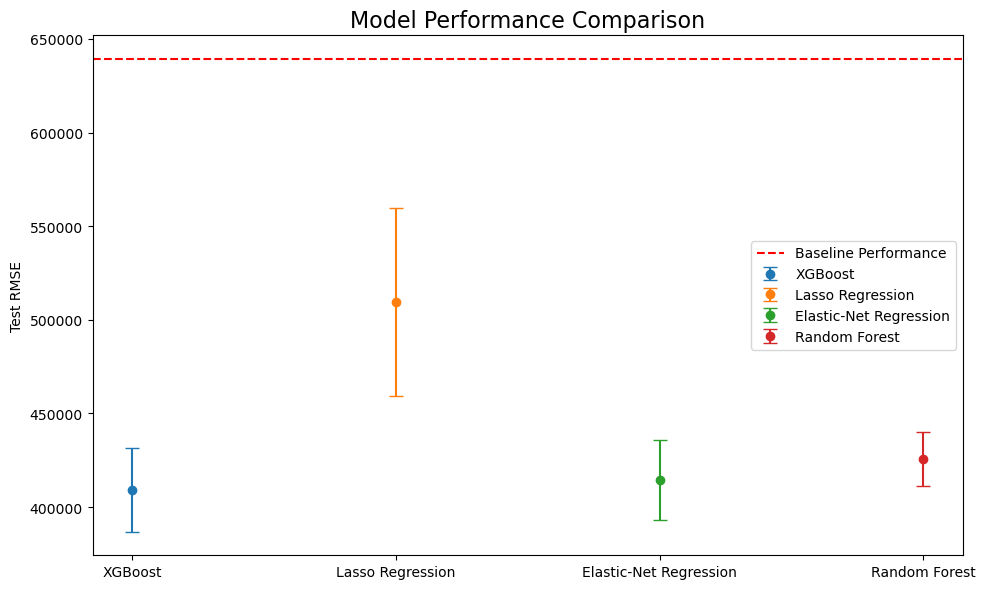

In [11]:
#model comparison 12/6

results_xgb = [(38, 439012.0204934638), (42, 387787.5766376659), (55, 387559.7852241038), (64, 422113.4137911719)]
test_rmses_xgb = [result[1] for result in results_xgb]
mean_test_rmse_xgb = np.mean(test_rmses_xgb)
std_test_rmse_xgb = np.std(test_rmses_xgb)

results_la = [(38, 520355.230055812), (42, 457904.21866778797), (55, 586870.323324356), (64, 472861.2069401903)]
test_rmses_la = [result[1] for result in results_la]
mean_test_rmse_la = np.mean(test_rmses_la)
std_test_rmse_la = np.std(test_rmses_la)

results_ela = [(38, 441826.51661813556), (42, 392553.96017076477), (55, 395087.3150522636), (64, 428690.78564080765)]
test_rmses_ela = [result[1] for result in results_ela]
mean_test_rmse_ela = np.mean(test_rmses_ela)
std_test_rmse_ela = np.std(test_rmses_ela)

results_rf = [(38, 450913.5456574431), (42, 416547.3025954825), (55, 417036.26749794354), (64, 418682.3928374486)]
test_rmses_rf = [result[1] for result in results_rf]
mean_test_rmse_rf = np.mean(test_rmses_rf)
std_test_rmse_rf = np.std(test_rmses_rf)


models = ['XGBoost', 'Lasso Regression', 'Elastic-Net Regression', 'Random Forest']
means = [mean_test_rmse_xgb, mean_test_rmse_la, mean_test_rmse_ela, mean_test_rmse_rf]
stds = [std_test_rmse_xgb, std_test_rmse_la, std_test_rmse_ela, std_test_rmse_rf]
x_pos = np.arange(len(models))
baseline = 639287.1851762069

#plotting
plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.errorbar(x_pos[i], means[i], yerr=stds[i], fmt='o', capsize=5, label=models[i])


plt.axhline(y=baseline, color='r', linestyle='--', label='Baseline Performance')


plt.xticks(x_pos, models)
plt.ylabel('Test RMSE')
plt.title('Model Performance Comparison',fontsize=16)
plt.legend()



plt.tight_layout()
#plt.savefig('mel7/model_comparison_6.png',dpi=500)
plt.show()



In [13]:
results_xgb = [(38, 439012.0204934638), (42, 387787.5766376659), (55, 387559.7852241038), (64, 422113.4137911719)]
test_rmses_xgb = [result[1] for result in results_xgb]
#print(np.mean(test_rmses_xgb))
print(std_test_rmse_xgb)
print(std_test_rmse_rf)
print(std_test_rmse_ela)
print(std_test_rmse_la)


22261.3837499437
14523.82369472275
21252.009445853553
50270.58965910467
random forest mean 425794.87714707945
random forest mean 409118.19903660135
random forest mean 414539.6443704929
random forest mean 509497.7447470366
